In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
import re
import string
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse

In [4]:
train=pd.read_csv('C:/Users/HP/OneDrive/Desktop/ml-lab/data/training.1600000.processed.noemoticon.csv', encoding='latin1', header=None)
dftest=pd.read_csv('C:/Users/HP/OneDrive/Desktop/ml-lab/data/testdata.manual.2009.06.14.csv', encoding='latin1', header=None)

In [5]:
# Assuming your DataFrame is named 'df'
train.columns = ['Polarity', 'id', 'date', 'query', 'user', 'tweet']
dftest.columns = ['Polarity', 'id', 'date', 'query', 'user', 'tweet']

In [6]:
train.shape

(1600000, 6)

In [7]:
dftest.shape

(498, 6)

In [8]:
dftest['Polarity'].value_counts()
# train['Polarity'].value_counts()

Polarity
4    182
0    177
2    139
Name: count, dtype: int64

In [9]:
train['Polarity'].value_counts()

Polarity
0    800000
4    800000
Name: count, dtype: int64

In [10]:
train1 = train[["Polarity", "tweet"]]
dftest1 = dftest[["Polarity", "tweet"]]

In [11]:
dftest1['Polarity'].value_counts()

Polarity
4    182
0    177
2    139
Name: count, dtype: int64

In [12]:
train1['Polarity'].value_counts()

Polarity
0    800000
4    800000
Name: count, dtype: int64

In [13]:
train1["Polarity"] = train1["Polarity"].replace(4,1)
train1["Polarity"] = train1["Polarity"].replace(0,-1)

In [14]:
dftest1["Polarity"]  = dftest1["Polarity"].replace(4,1)
dftest1["Polarity"]  = dftest1["Polarity"].replace(0,-1)
dftest1["Polarity"]  = dftest1["Polarity"].replace(2,0)

In [15]:
tweets_df = pd.concat([train1,dftest1], axis=0)

<Axes: xlabel='Polarity', ylabel='count'>

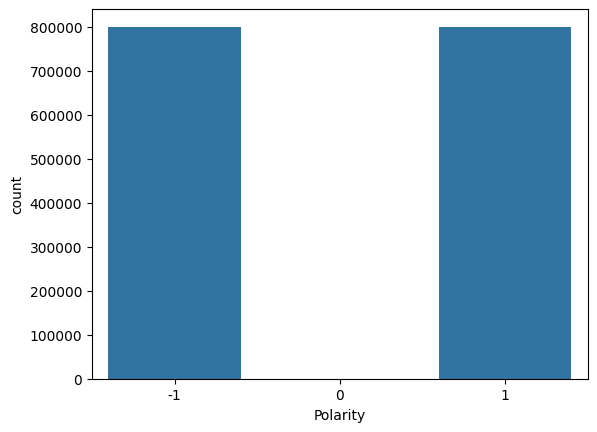

In [16]:
sns.countplot(data =tweets_df, x = "Polarity")

In [17]:
tweets_df["tweet"] = tweets_df["tweet"].astype(str)
tweets_df.reset_index(drop = True,inplace=True)

In [18]:
tweets_df["length"] = tweets_df["tweet"].apply(len)

In [19]:
tweets_df.groupby("Polarity")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
Polarity,,,,,,,,
-1,800177.0,74.304081,36.743642,6.0,44.0,70.0,104.0,359.0
0,139.0,72.517986,32.992391,11.0,48.0,69.0,95.0,144.0
1,800182.0,73.880350,36.135391,6.0,44.0,69.0,103.0,374.0


In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [21]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
def clean_text(text):
    pat1 = r'@[^ ]+'
    pat2 = r'https?://[A-Za-z0-9./]+'
    pat3 = r'\'s'
    pat4 = r'\#\w+'
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [23]:
tweets_df["cleaned_tweet"] = tweets_df["tweet"].apply(clean_text)

In [24]:
tweets_df = tweets_df [ ~(tweets_df["cleaned_tweet"] =="")]

In [25]:
lem = WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist= []
    token = sentence.split()
    for tok in token:
        outlist.append(lem.lemmatize(tok))
    return " ".join(outlist)

In [26]:
tweets_df["cleaned_tweet"] = tweets_df["cleaned_tweet"].apply(tokenize_lem)

In [27]:
tweets_df.head()

,Polarity,tweet,length,cleaned_tweet
0,-1,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that a bummer you shoulda got david carr ...
1,-1,is upset that he can't update his Facebook by ...,111,is upset that he cant update his facebook by t...
2,-1,@Kenichan I dived many times for the ball. Man...,89,i dived many time for the ball managed to save...
3,-1,my whole body feels itchy and like its on fire,47,my whole body feel itchy and like it on fire
4,-1,"@nationwideclass no, it's not behaving at all....",111,no it not behaving at all im mad why am i here...


In [28]:
train['date'] = pd.to_datetime(train['date'], errors='coerce')

In [29]:
sentiment_trends = train.groupby([pd.Grouper(key='date', freq='D'), 'Polarity']).size().unstack().fillna(0)

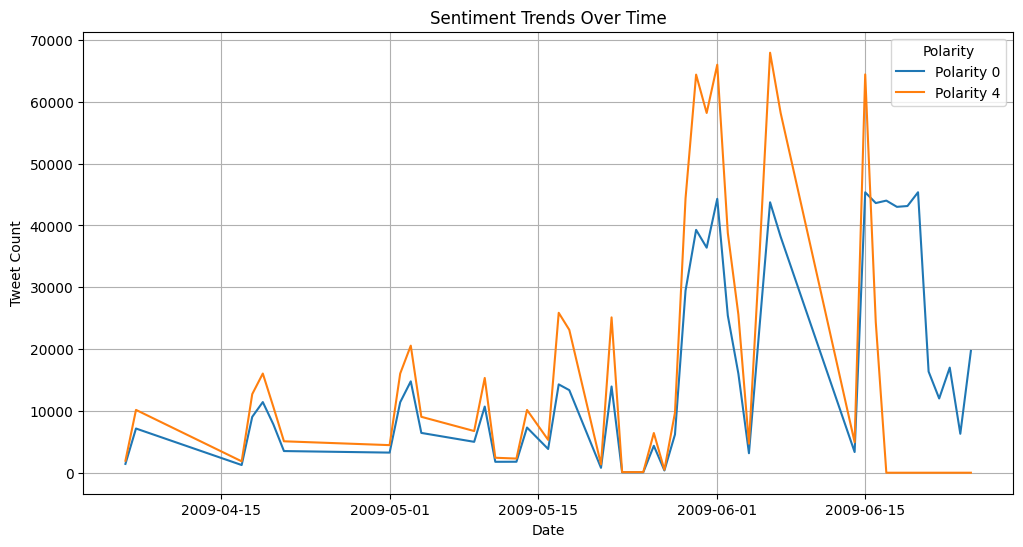

In [30]:
plt.figure(figsize=(12, 6))
for polarity in sentiment_trends.columns:
    plt.plot(sentiment_trends.index, sentiment_trends[polarity], label=f"Polarity {polarity}")

plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.legend(title="Polarity")
plt.grid(True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(tweets_df[["cleaned_tweet","length"]], tweets_df["Polarity"], test_size=0.1, random_state=42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train["cleaned_tweet"])

TfidfVectorizer()

In [35]:
X_train_v = tfidf.transform(X_train["cleaned_tweet"])
X_test_v = tfidf.transform(X_test["cleaned_tweet"])

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [38]:
scaler.fit([X_train["length"]])
scaler2.fit([X_test["length"]])

MinMaxScaler()

In [39]:
X_train_len = scaler.transform([X_train["length"]])
X_train_len = X_train_len.reshape( X_train_v.shape[0], 1)

X_train = scipy.sparse.hstack([X_train_v,X_train_len], format = "csr")

In [40]:
X_train.shape

(1436896, 374094)

In [41]:
X_test.shape

(159656, 2)

In [42]:
# Instead of fitting on the entire X_test["length"], fit on a single sample:
scaler2.fit(X_test[["length"]][:1])

# Now, the transform should work:
X_test_len = scaler2.transform(X_test[["length"]])
X_test_len = X_test_len.reshape(X_test_v.shape[0], 1)

X_test = scipy.sparse.hstack([X_test_v,X_test_len], format = "csr")

In [43]:
import random

# Assuming X_train and y_train are your data and labels
# Get a list of indices to sample
sample_indices = random.sample(range(X_train.shape[0]), 500000)

# Reset index of y_train before sampling
y_train1 = y_train.reset_index(drop=True)

# Select the samples and labels using the indices
X_train_sampled = X_train[sample_indices]
y_train_sampled = y_train1[sample_indices] # Now this should work without KeyError

In [44]:
X_train_sampled.shape

(500000, 374094)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [46]:
# lr=LogisticRegression()
# lr.fit(X_train_sampled,y_train_sampled)
# print(lr.score(X_test,y_test))

In [47]:
# print(lr.score(X_train_sampled,y_train_sampled))

In [48]:
from sklearn.metrics import accuracy_score, recall_score, classification_report,accuracy

In [49]:
# y_pred=lr.predict(X_test)

In [ ]:
# acuracy=accuracy_score(y_test,y_pred)
# acuracy

In [51]:
# print(classification_report(y_test,y_pred))


In [56]:
import joblib

In [57]:
joblib.dump(lr,"Sentiment_model.pkl")

['Sentiment_model.pkl']

In [53]:
# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['none', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

# # Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf']
# }

In [62]:
#grid search
grid_search= GridSearchCV(LogisticRegression(max_iter=1000,random_state=42),param_grid_lr,cv=3,scoring="accuracy")
grid_search.fit(X_train_sampled,y_train_sampled)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['none', 'l2']},
             scoring='accuracy')

In [65]:
print("Logistic Regression:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Logistic Regression:
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.7900819990903188


In [64]:
# Evaluate the best model
best_model = grid_search.best_estimator_
lr_preds = best_model.predict(X_test)
print("Tuned Logistic Regression Results:")
print(classification_report(y_test, lr_preds))
print("Accuracy:", 100 * accuracy_score(y_test, lr_preds))

Tuned Logistic Regression Results:
              precision    recall  f1-score   support

          -1       0.80      0.78      0.79     79416
           0       0.00      0.00      0.00        14
           1       0.79      0.80      0.79     80226

    accuracy                           0.79    159656
   macro avg       0.53      0.53      0.53    159656
weighted avg       0.79      0.79      0.79    159656

Accuracy: 79.15706268477226


In [66]:
!pip install mlflow

In [67]:
import mlflow

SyntaxError: invalid syntax (3574192917.py, line 1)

In [68]:
report_dict = classification_report(y_test, lr_preds, output_dict=True)
report_dict

{'-1': {'precision': 0.7950491631397921,
  'recall': 0.782965649239448,
  'f1-score': 0.7889611419508327,
  'support': 79416.0},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14.0},
 '1': {'precision': 0.7882303829484204,
  'recall': 0.8002268591229776,
  'f1-score': 0.7941833206534177,
  'support': 80226.0},
 'accuracy': 0.7915706268477226,
 'macro avg': {'precision': 0.5277598486960708,
  'recall': 0.5277308361208085,
  'f1-score': 0.5277148208680834,
  'support': 159656.0},
 'weighted avg': {'precision': 0.7915530580894529,
  'recall': 0.7915706268477226,
  'f1-score': 0.7915160666176556,
  'support': 159656.0}}

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

try:
    cv_scores = cross_val_score(LogisticRegression, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean()*100:.2f}%")
except Exception as e:
    print(f"An error occurred during cross-validation: {e}")

is_classifier
An error occurred during cross-validation: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.


In [76]:
mlflow.set_experiment("Sentiment Analysis")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run():
    mlflow.log_param("algorithm", "Logistic Regression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("C", 0.1)
    mlflow.log_param("solver", "liblinear")
    mlflow.log_metric("accuracy", 0.8)
    mlflow.log_metric("precision", 0.85)
    mlflow.log_metric("recall", 0.83)
    mlflow.log_metric("f1_score", 0.84)
    mlflow.log_artifact("logistic_regression_model.pkl")
    mlflow.sklearn.log_model(best_model, "logistic_regression_model")
from sklearn.metrics import classification_report

2024/12/29 13:30:10 INFO mlflow.tracking.fluent: Experiment with name 'Sentiment Analysis' does not exist. Creating a new experiment.


RestException: RESOURCE_DOES_NOT_EXIST: Could not find experiment with ID 415930262449633416

In [54]:
# Logistic Regression
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=2)

# Random Forest
# rf = RandomForestClassifier()
# grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=2)

# # SVM
# svm = SVC()
# grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=2)

In [55]:
grid_search_lr.fit(X_train_sampled,y_train_sampled)
# grid_search_rf.fit(X_test,y_test)
# grid_search_svm.fit(X_test,y_test)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['none', 'l2']})

Logistic Regression:
Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.7890 440000000001

In [56]:
print("Logistic Regression:")
print("Best parameters:", grid_search_lr.best_params_)
print("Best score:", grid_search_lr.best_score_)

# print("\nRandom Forest:")
# print("Best parameters:", grid_search_rf.best_params_)
# print("Best score:", grid_search_rf.best_score_)

# print("\nSVM:")
# print("Best parameters:", grid_search_svm.best_params_)
# print("Best score:", grid_search_svm.best_score_)

Logistic Regression:
Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.7888379999999999


In [57]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [58]:
y_pred_lr = grid_search_lr.predict(X_test)
# y_pred_rf = grid_search_rf.predict(X_test)
# y_pred_svm = grid_search_svm.predict(X_test)

In [59]:
y_pred=grid_search_lr.predict(X_train)
accuracy_lr = accuracy_score(y_train, y_pred)
print(accuracy_lr)

0.8048627040509543


In [61]:
# # Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')  # Use 'weighted' for multi-class

# Random Forest
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# # SVM
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

In [77]:
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.7917146865761387
Recall: 0.7917146865761387
              precision    recall  f1-score   support

          -1       0.80      0.78      0.79     79416
           0       0.00      0.00      0.00        14
           1       0.79      0.80      0.79     80226

    accuracy                           0.79    159656
   macro avg       0.53      0.53      0.53    159656
weighted avg       0.79      0.79      0.79    159656



In [ ]:
# print("random forest:")
# print("Accuracy:", accuracy_rf)
# print("Recall:", recall_rf)
# print(classification_report(y_test, y_pred_rf))


In [ ]:
# print("svm:")
# print("Accuracy:", accuracy_svm)
# print("Recall:", recall_svm)
# print(classification_report(y_test, y_pred_svm))

In [145]:


# # 1. Group by cluster and user, count tweets
cluster_user_counts = tweets_df.groupby(['cluster', 'user'])['tweet'].count().reset_index()

# # 2. Find top users for each cluster
# top_users_per_cluster = {}
# for cluster in cluster_user_counts['cluster'].unique():
#     top_users = cluster_user_counts[cluster_user_counts['cluster'] == cluster].sort_values(
#         by='tweet', ascending=False
#     ).head(10)  # Get top 10 users
# top_users_per_cluster[cluster] = top_users['user'].tolist()

# # 3. Print top influencers for each cluster
# print("Top influencers per cluster:")
# for cluster, users in top_users_per_cluster.items():
#     print(f"Cluster {cluster}: {', '.join(users)}")



KeyError: 'cluster'

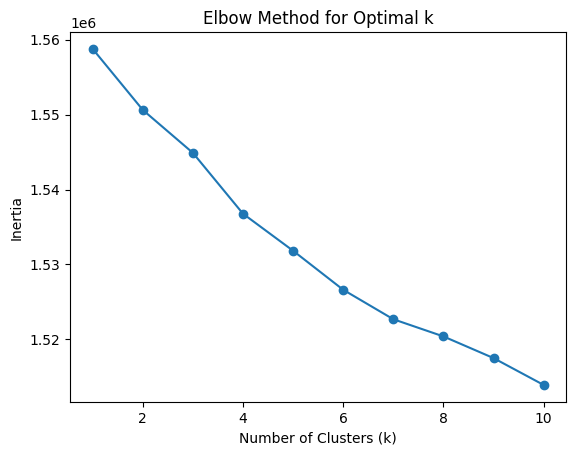

Top terms per cluster:
Cluster 0: my to and is on the in of for im
Cluster 1: it to and the wa but is so that im
Cluster 2: to is and im that me for so good have
Cluster 3: you to are thank me love have the your for
Cluster 4: the to in of for is and on at with


In [148]:

# from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import TfidfVectorizer




# vectorizer = TfidfVectorizer(max_features=5000)
# tfidf_matrix = vectorizer.fit_transform(tweets_df["cleaned_tweet"])


# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(tfidf_matrix)
#     inertia.append(kmeans.inertia_)


# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.show()


# k = 5
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(tfidf_matrix)


# tweets_df['cluster'] = kmeans.labels_

# # 5. Analyze the clusters
# # Print the top terms for each cluster
# print("Top terms per cluster:")
# order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names_out()
# for i in range(k):
#     print(f"Cluster {i}:", end="")
#     for ind in order_centroids[i, :10]: # Print top 10 terms
#         print(f" {terms[ind]}", end="")
#     print()



In [150]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans

In [154]:
# silhouette_scores = []
# for k in range(2, 11):  # Try cluster numbers from 2 to 10
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(tfidf_matrix)
#     silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))

KeyboardInterrupt: 

In [ ]:
# import matplotlib.pyplot as plt
#  plt.plot(range(2, 11), silhouette_scores, marker='o')
#  plt.title('Silhouette Method for Optimal k')
#  plt.xlabel('Number of Clusters (k)')
#  plt.ylabel('Silhouette Score')
#  plt.show()